In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_images = [
    "../images/ex01.jpg",
    "../images/ex02.jpg",
    "../images/abstract_ex01.jpg",
    "../images/abstract_ex02.jpg",
    "../images/abstract_ex03.jpg",
]

In [5]:
inputImage = cv2.imread("../images/ex01.jpg")
"""
-   In the case of color images, the decoded images will have the channels stored in **B G R** order.
"""

'\n-   In the case of color images, the decoded images will have the channels stored in **B G R** order.\n'

283341.5
272570.0


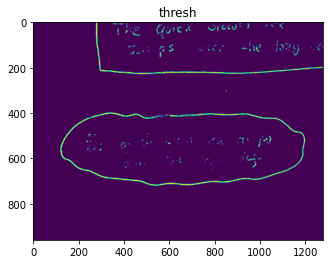

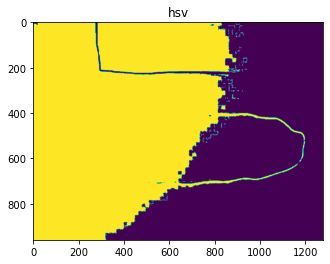

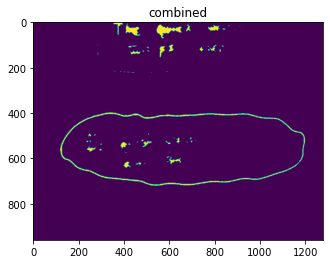

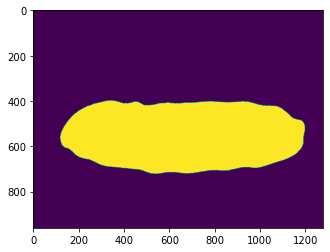

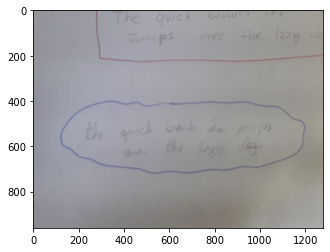

In [6]:
image = inputImage

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))

reach = 19
thickness = 3

kernel_plus = cv2.getStructuringElement(cv2.MORPH_CROSS, (reach,reach))
kernel_plusthick = cv2.morphologyEx(kernel_plus, cv2.MORPH_DILATE, kernel2, iterations = thickness)
kernel_x = ((np.diag(np.ones(reach, dtype = int)) + np.diag(np.ones(reach, dtype = int))[::-1]) > 0).astype(np.uint8)
kernel_xthick = cv2.morphologyEx(kernel_x, cv2.MORPH_DILATE, kernel2, iterations = thickness)

blur = cv2.medianBlur(image, 7)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
# gray = blur[:, :, 2] # noss... que merda eu fiz...

MASK = np.zeros_like(gray, dtype = np.uint8)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)
thresh = 255 - thresh


# plt.imshow(thresh)
# plt.show()

# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel_plusthick, iterations = 1)
# thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel_xthick, iterations = 1)




hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
# lower = np.array([150, 0, 0]) 
# upper = np.array([255, 255, 255])
lower = np.array([90, 0, 0]) 
upper = np.array([150, 255, 255])
hsv_filtered = cv2.inRange(hsv, lower, upper)

# hsv_filtered = cv2.morphologyEx(hsv_filtered, cv2.MORPH_CLOSE, kernel11x, iterations = 1) 



# plt.imshow(hsv_filtered)
# plt.show()

# thresh = cv2.bitwise_and(thresh, thresh, mask = mask) 

# canny = cv2.Canny(thresh, 120, 255, 1)

# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 10)
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel11x, iterations = 2)

# t = cv2.morphologyEx(t, cv2.MORPH_GRADIENT, kernel, iterations = 1)
# t = cv2.morphologyEx(t, cv2.MORPH_OPEN, kernel2, iterations = 3)


combined = cv2.bitwise_and(thresh, hsv_filtered)

combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel_plusthick, iterations = 1)
combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel_xthick, iterations = 1)
combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel, iterations = 1)



# minLineLength = 6 # set to min to allow more smoothness
# maxLineGap = 6 # larger values can cause more blocky segment and can merge wrong elements
# lines = cv2.HoughLinesP(combined,cv2.HOUGH_PROBABILISTIC, np.pi/360, 50, minLineLength,maxLineGap)
# for x in range(0, len(lines)):
#     for x1,y1,x2,y2 in lines[x]:
#         #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#         pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#         d = (pts[1] - pts[0]) * .8 # Escalar com a imagem!! Pegue uma proporção da figura
#         pts = np.array([pts[0] - d, pts[1] + d], np.int32)
#         cv2.polylines(MASK, [pts], True, (255,255,255), 3)
        
# MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel11x, iterations = 2) # connects very well

# minLineLength = 1
# maxLineGap = 5
# lines = cv2.HoughLinesP(MASK,cv2.HOUGH_PROBABILISTIC, np.pi/360, 20, minLineLength,maxLineGap)
# lines = lines if type(lines) != "NoneType" else []
# for x in range(0, len(lines)):
#     for x1,y1,x2,y2 in lines[x]:
#         #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#         pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#         d = (pts[1] - pts[0]) 
#         if np.linalg.norm(d) > 20:
#             continue
#         d = d * 1 # Escalar com a imagem!! Pegue uma proporção da figura
#         pts = np.array([pts[0] - d, pts[1] + d], np.int32)
#         cv2.polylines(MASK, [pts], True, (255,255,255), 3)
        
# MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel11x, iterations = 1)   
# MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel, iterations = 2)
        
_, cnts, hierarchy = cv2.findContours(combined, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

min_area = 10 ** 5
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        print(area)
        cv2.drawContours(MASK,[c], 0, (255, 255, 255), -1)
        continue
        
MASK = cv2.morphologyEx(MASK, cv2.MORPH_OPEN, kernel, iterations = 3)

plt.title("thresh")
plt.imshow(thresh)
plt.show()

plt.title("hsv")
plt.imshow(hsv_filtered)
plt.show()

plt.title("combined")
plt.imshow(combined)
plt.show()

plt.imshow(MASK)
plt.show()

plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB))
plt.show()

In [430]:
def segment(image, color):

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))

    reach = 19
    thickness = 3

    kernel_plus = cv2.getStructuringElement(cv2.MORPH_CROSS, (reach,reach))
    kernel_plusthick = cv2.morphologyEx(kernel_plus, cv2.MORPH_DILATE, kernel2, iterations = thickness)
    kernel_x = ((np.diag(np.ones(reach, dtype = int)) + np.diag(np.ones(reach, dtype = int))[::-1]) > 0).astype(np.uint8)
    kernel_xthick = cv2.morphologyEx(kernel_x, cv2.MORPH_DILATE, kernel2, iterations = thickness)

    blur = cv2.medianBlur(image, 7)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,31, 3)
    thresh = 255 - thresh

    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV).astype(int)
    # lower = np.array([150, 0, 0]) 
    # upper = np.array([255, 255, 255])
#     print(hsv.dtype)
    if color == "blue":
        lower = np.array([90, 0, 0]) 
        upper = np.array([150, 255, 255])
        hsv_filtered = cv2.inRange(hsv, lower, upper)
    else:
        rotate = 10
        lower = np.array([140 - rotate, 0, 0]) 
        upper = np.array([255, 255, 255])
        hsv_filtered = cv2.inRange((hsv - rotate) % 255, lower, upper)

    
#     minLineLength = 1
#     maxLineGap = 9
#     lines = cv2.HoughLinesP(thresh,cv2.HOUGH_PROBABILISTIC, np.pi/360, 1, minLineLength,maxLineGap)
#     lines = lines if type(lines) != "NoneType" else []
#     for x in range(0, len(lines)):
#         for x1,y1,x2,y2 in lines[x]:
#             #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#             pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#             d = (pts[1] - pts[0]) 
#             if np.linalg.norm(d) > 30:
#                 continue
#             d = d * 1 # Escalar com a imagem!! Pegue uma proporção da figura
#             pts = np.array([pts[0] - d, pts[1] + d], np.int32)
#             cv2.polylines(thresh, [pts], True, (255,255,255), 3)
            
#     minLineLength = 1
#     maxLineGap = 9
#     lines = cv2.HoughLinesP(hsv_filtered,cv2.HOUGH_PROBABILISTIC, np.pi/360, 1, minLineLength,maxLineGap)
#     lines = lines if type(lines) != "NoneType" else []
#     for x in range(0, len(lines)):
#         for x1,y1,x2,y2 in lines[x]:
#             #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#             pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#             d = (pts[1] - pts[0]) 
#             if np.linalg.norm(d) > 30:
#                 continue
#             d = d * 1 # Escalar com a imagem!! Pegue uma proporção da figura
#             pts = np.array([pts[0] - d, pts[1] + d], np.int32)
#             cv2.polylines(hsv_filtered, [pts], True, (255,255,255), 3)
            
    # hsv_filtered = cv2.morphologyEx(hsv_filtered, cv2.MORPH_DILATE, kernel, iterations = 2)
    # doesnt work -> the region around lines with different colors are selected
    
    combined = cv2.bitwise_and(thresh, hsv_filtered)
    
    combined = cv2.morphologyEx(combined, cv2.MORPH_DILATE, kernel, iterations = 2)
    
    
    
    
#     minLineLength = 15
#     max_d = 200
#     maxLineGap = max_d // 2
#     min_votes = 10
#     d_mult = 1
    
#     combined_thick = cv2.morphologyEx(combined, cv2.MORPH_DILATE, kernel, iterations = 3)    
#     lines = cv2.HoughLinesP(combined_thick,cv2.HOUGH_PROBABILISTIC, np.pi/360, min_votes, minLineLength,maxLineGap)
#     lines = lines if type(lines) != "NoneType" else []
#     for x in range(0, len(lines)):
#         for x1,y1,x2,y2 in lines[x]:
#             #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#             pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#             d = (pts[1] - pts[0])
#             if np.linalg.norm(d) > max_d:
#                 continue
#             d = d * d_mult # Escalar com a imagem!! Pegue uma proporção da figura
#             pts = np.array([pts[0] - d, pts[1] + d], np.int32)
#             cv2.polylines(combined, [pts], False, (255,255,255), 1, lineType=cv2.LINE_AA)
            
#     combined_thick = cv2.morphologyEx(combined, cv2.MORPH_DILATE, kernel, iterations = 3) 
#     lines = cv2.HoughLinesP(combined_thick,cv2.HOUGH_PROBABILISTIC, np.pi/360, min_votes, minLineLength,maxLineGap)
#     lines = lines if type(lines) != "NoneType" else []
#     for x in range(0, len(lines)):
#         for x1,y1,x2,y2 in lines[x]:
#             #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#             pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#             d = (pts[1] - pts[0])
#             if np.linalg.norm(d) > max_d:
#                 continue
#             d = d * d_mult # Escalar com a imagem!! Pegue uma proporção da figura
#             pts = np.array([pts[0] - d, pts[1] + d], np.int32)
#             cv2.polylines(combined, [pts], True, (255,255,255), 1, lineType=cv2.LINE_AA)
            
# #     combined_thick = cv2.morphologyEx(combined, cv2.MORPH_DILATE, kernel, iterations = 3) 
# #     lines = cv2.HoughLinesP(combined_thick,cv2.HOUGH_PROBABILISTIC, np.pi/360, min_votes, minLineLength,maxLineGap)
# #     lines = lines if type(lines) != "NoneType" else []
# #     for x in range(0, len(lines)):
# #         for x1,y1,x2,y2 in lines[x]:
# #             #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
# #             pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
# #             d = (pts[1] - pts[0])
# #             if np.linalg.norm(d) > max_d:
# #                 continue
# #             d = d * d_mult # Escalar com a imagem!! Pegue uma proporção da figura
# #             pts = np.array([pts[0] - d, pts[1] + d], np.int32)
# #             cv2.polylines(combined, [pts], True, (255,255,255), 1, lineType=cv2.LINE_AA)
    
#     combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel_plusthick, iterations = 1)
#     combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel_xthick, iterations = 1)
#     combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel, iterations = 1)
    
    

    _, cnts, hierarchy = cv2.findContours(combined, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_SIMPLE)

    MASK = np.zeros_like(gray, dtype = np.uint8)
    min_area = 10 ** 5
    for c in cnts:
        area = cv2.contourArea(c)
#         perimeter = cv2.arcLength(c, False)

        xs = np.array(c).ravel()[::2]
        ys = np.array(c).ravel()[1::2]
        longest = max(xs.max() - xs.min(), ys.max() - ys.min())
#         if area > min_area:
#             cv2.drawContours(MASK,[c], 0, (255, 255, 255), -1)
#             continue
        if longest > 150:
            # should verify here if figure has large area, if it has then, it is a block already
            cv2.drawContours(MASK,[c], 0, (255, 255, 255), -1)
            continue
            
    MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel_plusthick, iterations = 1)
    MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel_xthick, iterations = 1)
    MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel3, iterations = 1)
    
    _, cnts, hierarchy = cv2.findContours(MASK, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_SIMPLE)
    # parameter mode is probably wrong: https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71
    
    MASK = np.zeros_like(gray, dtype = np.uint8)
    for c in cnts:
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        box_area = cv2.contourArea(box)
        if box_area > 10**5: # test should be proportion perimeter vs area
            # if want to see what is left from the image before:
#             cv2.drawContours(MASK,[c], 0, (255, 255, 255), -1)
            # lazy approach to finish
            cv2.drawContours(MASK,[box], 0, (255, 255, 255), -1)
            
#     reach = 91
#     thickness = 10
    
#     kernel_plus = cv2.getStructuringElement(cv2.MORPH_CROSS, (reach,reach))
#     kernel_plusthick = cv2.morphologyEx(kernel_plus, cv2.MORPH_DILATE, kernel2, iterations = thickness)
#     kernel_x = ((np.diag(np.ones(reach, dtype = int)) + np.diag(np.ones(reach, dtype = int))[::-1]) > 0).astype(np.uint8)
#     kernel_xthick = cv2.morphologyEx(kernel_x, cv2.MORPH_DILATE, kernel2, iterations = thickness)
            
#     MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel_plusthick, iterations = 1)
#     MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel_xthick, iterations = 2)
#     MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel3, iterations = 2)
            
#     MASK = cv2.morphologyEx(MASK, cv2.MORPH_DI, kernel3, iterations = 1)
        
#         cv2.drawContours(MASK,[box],0,(255,255,255),1)
    

#     MASK = cv2.morphologyEx(MASK, cv2.MORPH_OPEN, kernel, iterations = 20)
    
#     MASK = cv2.morphologyEx(MASK, cv2.MORPH_DILATE, kernel, iterations = 1)
    
    
#     hsv_filtered = cv2.bitwise_and(MASK, hsv_filtered)
#     thresh = cv2.bitwise_and(MASK, thresh)
    
#     combined = cv2.bitwise_and(thresh, hsv_filtered)
    
#     combined = cv2.morphologyEx(combined, cv2.MORPH_DILATE, kernel, iterations = 5)
    
#     combined_thick = cv2.morphologyEx(combined, cv2.MORPH_DILATE, kernel, iterations = 3)    
#     lines = cv2.HoughLinesP(combined,cv2.HOUGH_PROBABILISTIC, np.pi/360, min_votes, minLineLength,maxLineGap)
#     lines = lines if type(lines) != type(None) else []
#     print(type(lines))
#     for x in range(0, len(lines)):
#         for x1,y1,x2,y2 in lines[x]:
#             #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
#             pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
#             d = (pts[1] - pts[0])
#             if np.linalg.norm(d) > max_d:
#                 continue
#             d = d * d_mult # Escalar com a imagem!! Pegue uma proporção da figura
#             pts = np.array([pts[0] - d, pts[1] + d], np.int32)
#             cv2.polylines(combined, [pts], False, (255,255,255), 5, lineType=cv2.LINE_AA)
    
#     reach = 31
#     thickness = 15
    
#     kernel_plus = cv2.getStructuringElement(cv2.MORPH_CROSS, (reach,reach))
#     kernel_plusthick = cv2.morphologyEx(kernel_plus, cv2.MORPH_DILATE, kernel2, iterations = thickness)
#     kernel_x = ((np.diag(np.ones(reach, dtype = int)) + np.diag(np.ones(reach, dtype = int))[::-1]) > 0).astype(np.uint8)
#     kernel_xthick = cv2.morphologyEx(kernel_x, cv2.MORPH_DILATE, kernel2, iterations = thickness)
    
#     combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel_plusthick, iterations = 1)
#     combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel_xthick, iterations = 1)
#     combined = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel3, iterations = 1)
    
    
#     combined = cv2.morphologyEx(combined, cv2.MORPH_ERODE, kernel, iterations = 5)
    
    

    plt.figure(figsize=(16, 8))
    n = 4
    i = 0
    
    i+=1
    plt.subplot(1,n,i)
#     plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB))
    plt.imshow(thresh)
    
    i+=1
    plt.subplot(1,n,i)
    plt.imshow(hsv_filtered)
    
    
    i+=1
    plt.subplot(1,n,i)
    plt.imshow(combined)
#     plt.imshow(hsv_filtered)
    
    i+=1
    plt.subplot(1,n,i)
#     plt.imshow(thresh)
    plt.imshow(MASK)
#     plt.show()

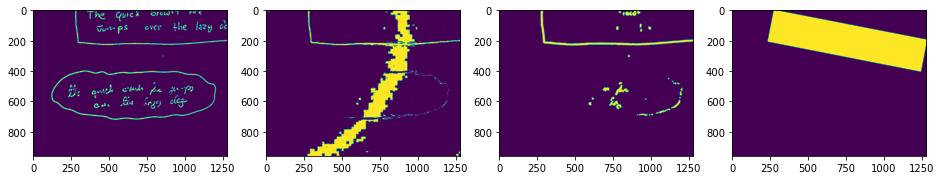

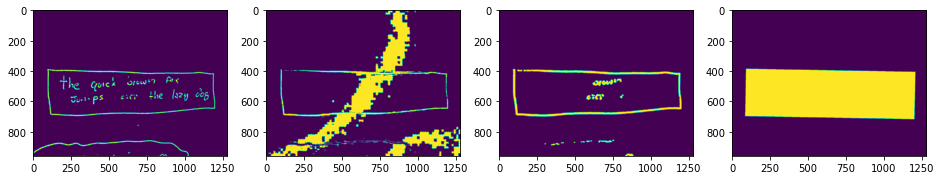

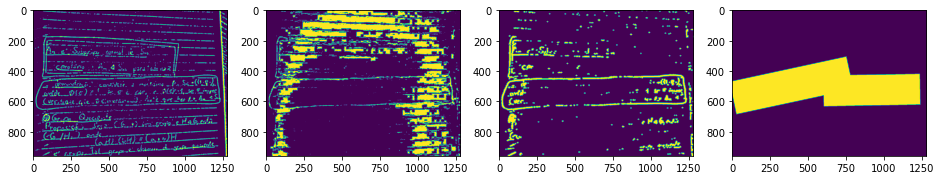

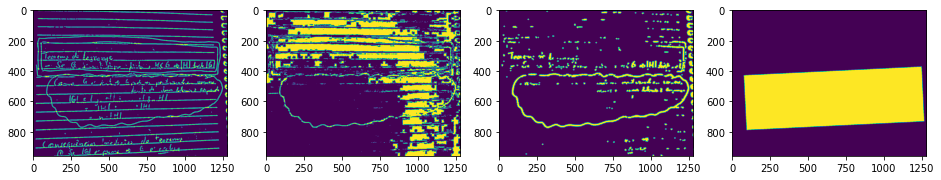

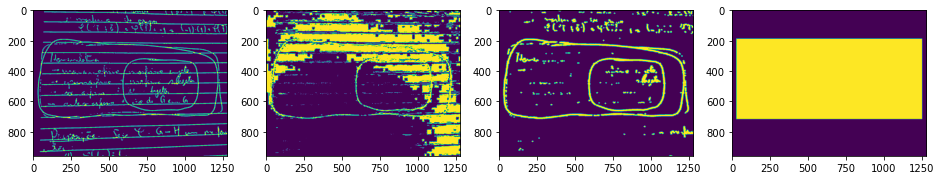

In [431]:
for image_path in path_images:
    inputImage = cv2.imread(image_path)
    segment(inputImage, "red")
    plt.show()